In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# DATA PREPROCESSING

bank= pd.read_csv('C:\\Users\\Acer\\Desktop\\ML\\DATA\\bank-full.csv')
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [3]:
df=bank['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";",expand=True)
df

#(spliting the data from single column to multiple columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [4]:
new_columns= ['Age','job','martial','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

#(renaming the column name)

In [5]:
df.columns=new_columns
df

,Age,job,martial,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [6]:
df['job']= [x.strip('""') for x in df['job']]
df['martial']= [x.strip('""') for x in df['martial']]
df['education']= [x.strip('""') for x in df['education']]
df['default']= [x.strip('""') for x in df['default']]
df['housing']= [x.strip('""') for x in df['housing']]
df['loan']= [x.strip('""') for x in df['loan']]
df['contact']= [x.strip('""') for x in df['contact']]
df['month']= [x.strip('""') for x in df['month']]
df['poutcome']= [x.strip('""') for x in df['poutcome']]
df['y']= [x.strip('""') for x in df['y']]
df

#(removing of quotes in the data which is not necessary)

,Age,job,martial,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df['y']=df['y'].replace({'yes':1,'no':0})

#(replacing binomials)

In [9]:
df.drop(['job'],axis=1,inplace=True)
df.drop(['martial'],axis=1,inplace=True)
df.drop(['education'],axis=1,inplace=True)
df.drop(['contact'],axis=1,inplace=True)
df.drop(['poutcome'],axis=1,inplace=True)

#(droping some of the columns)

In [10]:
df.isnull().sum()

#(there are nonull values)

Age         0
default     0
balance     0
housing     0
loan        0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [11]:
df['month']= df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

#(converting months from txt to no.)

In [12]:
dictionary= {'yes':1,'no':0,'unknown':-1}
df['housing']= df['housing'].map(dictionary)
df['default']= df['default'].map(dictionary)
df['loan']= df['loan'].map(dictionary)

In [13]:
df.head()

#(now all the data is in the numerical values)

,Age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,5,261,1,-1,0,0
1,44,0,29,1,0,5,5,151,1,-1,0,0
2,33,0,2,1,1,5,5,76,1,-1,0,0
3,47,0,1506,1,0,5,5,92,1,-1,0,0
4,33,0,1,0,0,5,5,198,1,-1,0,0


In [14]:
df.dtypes

Age         object
default      int64
balance     object
housing      int64
loan         int64
day         object
month        int64
duration    object
campaign    object
pdays       object
previous    object
y            int64
dtype: object

In [15]:
df['Age']= pd.to_numeric(df['Age'])
df['balance']= pd.to_numeric(df['balance'])
df['duration']= pd.to_numeric(df['duration'])
df.dtypes

#(changing the dtypes from object to numeric)

Age          int64
default      int64
balance      int64
housing      int64
loan         int64
day         object
month        int64
duration     int64
campaign    object
pdays       object
previous    object
y            int64
dtype: object

<BarContainer object of 2 artists>

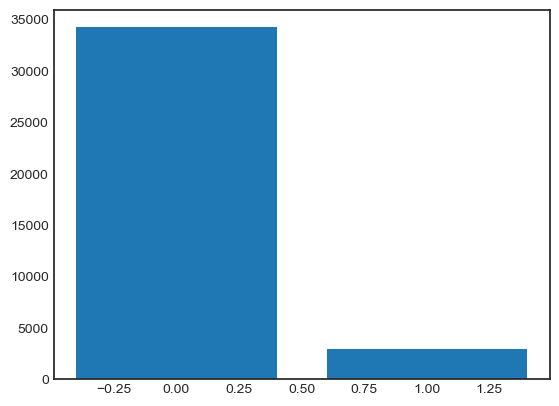

In [29]:
plt.bar(df['y'].unique(),df['y'].value_counts())

#counts of binomials of Y variable

C:\Users\Acer\AppData\Local\Temp\ipykernel_8484\3831291801.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'duration')

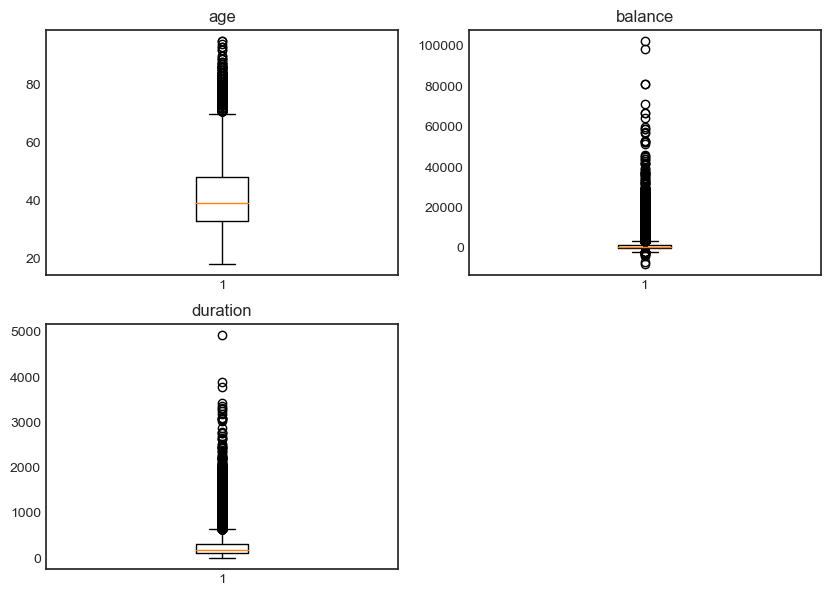

In [16]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-white')
plt.subplot(221)
plt.boxplot(df['Age'])
plt.title('age')
plt.subplot(222)
plt.boxplot(df['balance'])
plt.title('balance')
plt.subplot(223)
plt.boxplot(df['duration'])
plt.title('duration')

#(checking the outliers)

In [17]:
numerical_features=['Age','balance','duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

C:\Users\Acer\AppData\Local\Temp\ipykernel_8484\3891842354.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'duration')

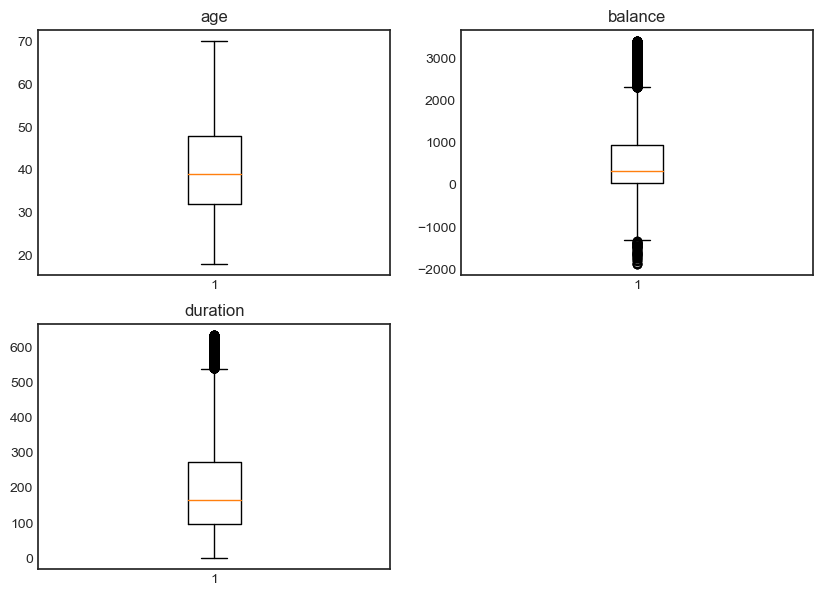

In [18]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-white')
plt.subplot(221)
plt.boxplot(df['Age'])
plt.title('age')
plt.subplot(222)
plt.boxplot(df['balance'])
plt.title('balance')
plt.subplot(223)
plt.boxplot(df['duration'])
plt.title('duration')

In [19]:
# MODELING

x= df.drop(['y'], axis=1)
y= df['y']

x_tr,x_ts,y_tr,y_ts= train_test_split(x,y, train_size= 0.8, random_state= 1)

print('training_data:',x_tr.shape)
print('testing_data:',x_ts.shape)
print('training_data:',y_tr.shape)
print('testing_data:',y_ts.shape)

training_data: (29720, 11)
testing_data: (7430, 11)
training_data: (29720,)
testing_data: (7430,)


In [37]:
model= LogisticRegression()
model.fit(x_tr,y_tr)
y_pred= model.predict(x_ts)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6848
           1       0.44      0.08      0.13       582

    accuracy                           0.92      7430
   macro avg       0.68      0.53      0.54      7430
weighted avg       0.89      0.92      0.89      7430



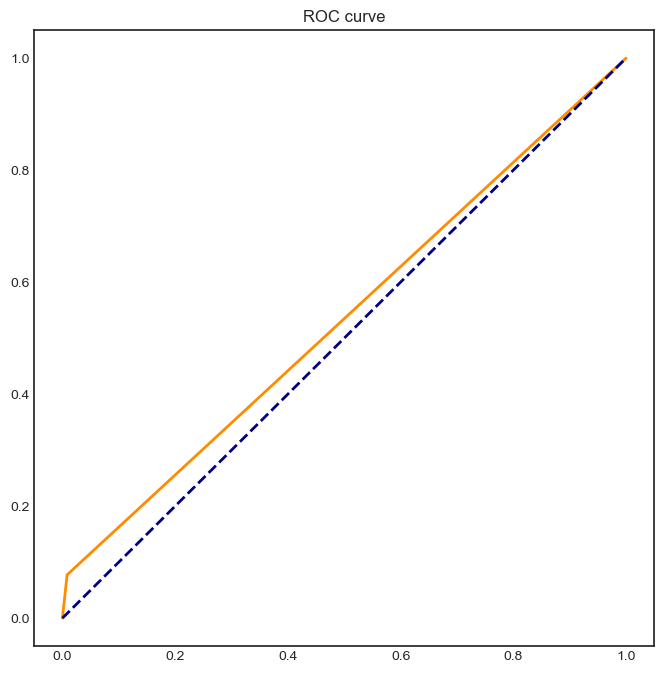

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold= roc_curve(y_ts, y_pred)
roc_auc= auc(fpr,tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Roc curve'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.title('ROC curve')
plt.show()

#(roc curve)

In [ ]:
#(here we can see that we got 92% of accuracy)